In [1]:
from astropy.io import fits
import math
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import os
import subprocess
from sklearn.cluster import DBSCAN
from analyzeImage import analyzeImage
import keras
from keras.models import load_model
from __future__ import print_function
%matplotlib inline

Using TensorFlow backend.


In [2]:
gpu_code_path = "../code/gpu/"
real_image_name = "chip_1"
real_image_path = "/home/kbmod-usr/cuda-workspace/fraizer/chip_1"#"../../HITS/trimmed_chip_03/Blind15A_02/night_1" #gpu_code_path+"images/"+real_image_name
psi_image_path = gpu_code_path+"output-images/psi"
phi_image_path = gpu_code_path+"output-images/phi"

In [3]:
image_mjd = []

for filename in sorted(os.listdir(real_image_path)):
    hdulist = fits.open(os.path.join(real_image_path, filename))
    image_mjd.append(hdulist[0].header['MJD'])

image_mjd = np.array(image_mjd)
image_times = image_mjd - image_mjd[0]
#image_times*=24.

Load Psi Images

In [4]:
hdulist = fits.open(os.path.join(psi_image_path, os.listdir(psi_image_path)[0]))
num_images = len(os.listdir(psi_image_path))
image_shape = np.shape(hdulist[0].data)
im_psi_array = np.zeros((num_images, image_shape[0], image_shape[1]))

for idx, filename in list(enumerate(sorted(os.listdir(psi_image_path)))):

    #print (str('Loaded ' + filename))

    image_file = os.path.join(psi_image_path, filename)
    hdulist = fits.open(image_file)
    im_psi_array[idx] = hdulist[0].data#*mask


Load Phi Images (for potentially making psi/phi stamps)

In [5]:
hdulist = fits.open(os.path.join(phi_image_path, os.listdir(phi_image_path)[0]))
num_images = len(os.listdir(phi_image_path))
image_shape = np.shape(hdulist[0].data)
im_phi_array = np.zeros((num_images, image_shape[0], image_shape[1]))

for idx, filename in list(enumerate(sorted(os.listdir(phi_image_path)))):

   # print (str('Loaded ' + filename))

    image_file = os.path.join(phi_image_path, filename)
    hdulist = fits.open(image_file)
    im_phi_array[idx] = hdulist[0].data#*mask


In [6]:
hdulist = fits.open(os.path.join(real_image_path, os.listdir(real_image_path)[0]))
num_images = len(os.listdir(real_image_path))
image_shape = np.shape(hdulist[1].data)
im_array = np.zeros((num_images, image_shape[0], image_shape[1]))


for idx, filename in list(enumerate(sorted(os.listdir(real_image_path)))):

   # print( str('Loaded ' + filename))

    image_file = os.path.join(real_image_path, filename)
    hdulist = fits.open(image_file)
    im_array[idx] = hdulist[1].data#*mask


In [7]:
ai = analyzeImage()

In [16]:
model = load_model('../../HITS/neural_net/new_kbmod_model.h5')

In [8]:
raw_results = np.genfromtxt('../data/results/maskTest.txt', names=True)

In [9]:
results = raw_results[0:480000] #np.where(raw_results['t0_y'] )#
#results = results[ results[:,1]>40 ]
print(len(results))
results

480000


array([(1700.0, 3980.0, 0.0, 0.0, 296.296, 113.804, 12.155, 1091.214),
       (1699.0, 3980.0, 0.0, 0.0, 302.644, 116.243, 12.012, 1070.41),
       (1700.0, 3981.0, 0.0, 0.0, 295.662, 105.734, 11.978, 1066.491), ...,
       (1875.0, 1084.0, 0.0, 0.0, 359.385, 39.96, 1.419, 119.896),
       (1917.0, 1092.0, 0.0, 0.0, 281.664, 31.318, 1.419, 116.817),
       (665.0, 1503.0, 0.0, 0.0, 277.906, 34.178, 1.419, 127.232)], 
      dtype=[('t0_x', '<f8'), ('t0_y', '<f8'), ('theta_par', '<f8'), ('theta_perp', '<f8'), ('v_x', '<f8'), ('v_y', '<f8'), ('likelihood', '<f8'), ('est_flux', '<f8')])

In [14]:
results_to_cluster = results
arg = dict(eps=0.001, min_samples=1, n_jobs=-1)
clustered_results = ai.clusterResults(results_to_cluster, dbscan_args=arg)#, im_array, image_times)
clustered_results =  results_to_cluster[np.array(clustered_results[1], dtype=np.int)]
#best_targets = range(stamp_count)
#best_targets

In [15]:
print( len(clustered_results) )
clustered_results

8809


array([(1700.0, 3980.0, 0.0, 0.0, 296.296, 113.804, 12.155, 1091.214),
       (501.0, 2278.0, 0.0, 0.0, 310.352, 115.077, 5.897, 507.0),
       (1136.0, 3082.0, 0.0, 0.0, 317.951, 157.449, 4.602, 529.783), ...,
       (270.0, 3575.0, 0.0, 0.0, 283.49, 62.042, 1.419, 126.792),
       (1273.0, 286.0, 0.0, 0.0, 227.446, 163.304, 1.419, 117.33),
       (1721.0, 485.0, 0.0, 0.0, 298.403, 126.734, 1.419, 129.273)], 
      dtype=[('t0_x', '<f8'), ('t0_y', '<f8'), ('theta_par', '<f8'), ('theta_perp', '<f8'), ('v_x', '<f8'), ('v_y', '<f8'), ('likelihood', '<f8'), ('est_flux', '<f8')])

In [17]:
filtered_results = ai.filter_results(im_array, clustered_results, image_times, model, chunk_size=2)

[0]
(array([0]),)
Finished chunk 1 of 7231
[]
(array([], dtype=int64),)
Finished chunk 2 of 7231
[]
(array([], dtype=int64),)
Finished chunk 3 of 7231
[]
(array([], dtype=int64),)
Finished chunk 4 of 7231
[]
(array([], dtype=int64),)
Finished chunk 5 of 7231
[]
(array([], dtype=int64),)
Finished chunk 6 of 7231
[]
(array([], dtype=int64),)
Finished chunk 7 of 7231
[]
(array([], dtype=int64),)
Finished chunk 8 of 7231
[]
(array([], dtype=int64),)
Finished chunk 9 of 7231
[]
(array([], dtype=int64),)
Finished chunk 10 of 7231
[]
(array([], dtype=int64),)
Finished chunk 11 of 7231
[]
(array([], dtype=int64),)
Finished chunk 12 of 7231
[]
(array([], dtype=int64),)
Finished chunk 13 of 7231
[]
(array([], dtype=int64),)
Finished chunk 14 of 7231
[]
(array([], dtype=int64),)
Finished chunk 15 of 7231
[]
(array([], dtype=int64),)
Finished chunk 16 of 7231
[]
(array([], dtype=int64),)
Finished chunk 17 of 7231
[]
(array([], dtype=int64),)
Finished chunk 18 of 7231
[]
(array([], dtype=int64),)
F

/home/kbmod-usr/cuda-workspace/kbmod/code/analyzeImage.py:584: RuntimeWarning: divide by zero encountered in double_scalars
  circularity = (1/(2.*np.pi))*(1/hu_mom[0])


[]
(array([], dtype=int64),)
Finished chunk 494 of 7231
[]
(array([], dtype=int64),)
Finished chunk 495 of 7231
[]
(array([], dtype=int64),)
Finished chunk 496 of 7231
[]
(array([], dtype=int64),)
Finished chunk 497 of 7231
[]
(array([], dtype=int64),)
Finished chunk 498 of 7231
[]
(array([], dtype=int64),)
Finished chunk 499 of 7231
[]
(array([], dtype=int64),)
Finished chunk 500 of 7231
[]
(array([], dtype=int64),)
Finished chunk 501 of 7231
[]
(array([], dtype=int64),)
Finished chunk 502 of 7231
[]
(array([], dtype=int64),)
Finished chunk 503 of 7231
[]
(array([], dtype=int64),)
Finished chunk 504 of 7231
[]
(array([], dtype=int64),)
Finished chunk 505 of 7231
[]
(array([], dtype=int64),)
Finished chunk 506 of 7231
[]
(array([], dtype=int64),)
Finished chunk 507 of 7231
[]
(array([], dtype=int64),)
Finished chunk 508 of 7231
[]
(array([], dtype=int64),)
Finished chunk 509 of 7231
[]
(array([], dtype=int64),)
Finished chunk 510 of 7231
[]
(array([], dtype=int64),)
Finished chunk 511 

/home/kbmod-usr/cuda-workspace/kbmod/code/analyzeImage.py:572: RuntimeWarning: invalid value encountered in double_scalars
  cr = mom[0,1]/mom[0,0]
/home/kbmod-usr/cuda-workspace/kbmod/code/analyzeImage.py:573: RuntimeWarning: invalid value encountered in double_scalars
  cc = mom[1,0]/mom[0,0]


[]
(array([], dtype=int64),)
Finished chunk 827 of 7231
[]
(array([], dtype=int64),)
Finished chunk 828 of 7231
[]
(array([], dtype=int64),)
Finished chunk 829 of 7231
[]
(array([], dtype=int64),)
Finished chunk 830 of 7231
[]
(array([], dtype=int64),)
Finished chunk 831 of 7231
[]
(array([], dtype=int64),)
Finished chunk 832 of 7231
[]
(array([], dtype=int64),)
Finished chunk 833 of 7231
[]
(array([], dtype=int64),)
Finished chunk 834 of 7231
[]
(array([], dtype=int64),)
Finished chunk 835 of 7231
[]
(array([], dtype=int64),)
Finished chunk 836 of 7231
[]
(array([], dtype=int64),)
Finished chunk 837 of 7231
[]
(array([], dtype=int64),)
Finished chunk 838 of 7231
[]
(array([], dtype=int64),)
Finished chunk 839 of 7231
[]
(array([], dtype=int64),)
Finished chunk 840 of 7231
[]
(array([], dtype=int64),)
Finished chunk 841 of 7231
[]
(array([], dtype=int64),)
Finished chunk 842 of 7231
[]
(array([], dtype=int64),)
Finished chunk 843 of 7231
[]
(array([], dtype=int64),)
Finished chunk 844 

In [18]:
print( len(filtered_results) )
filtered_results[1]

2


array([[  9.88540019e-01,   1.15000000e+01,   1.12000000e+01,
          1.00000000e+01,   4.04077239e+03],
       [  1.27323954e+00,   1.30000000e+01,   1.05000000e+01,
          2.00000000e+00,   3.15564902e+03],
       [  1.27323954e+00,   1.30000000e+01,   1.15000000e+01,
          2.00000000e+00,   1.05088742e+04]])

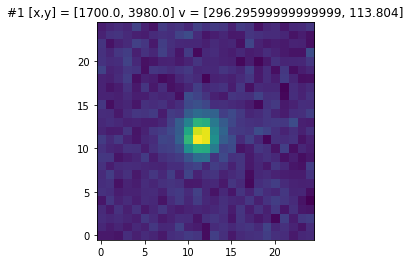

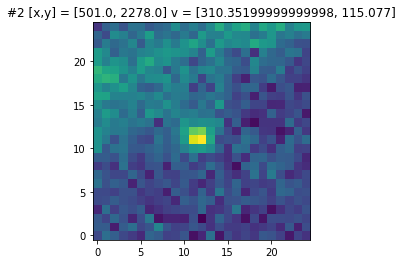

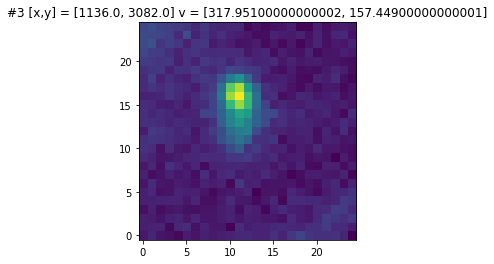

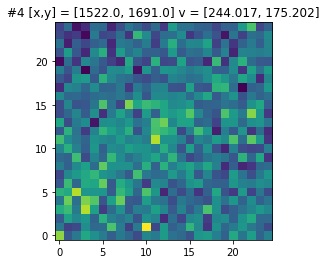

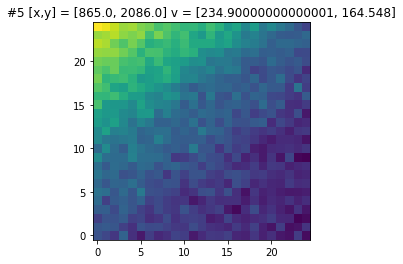

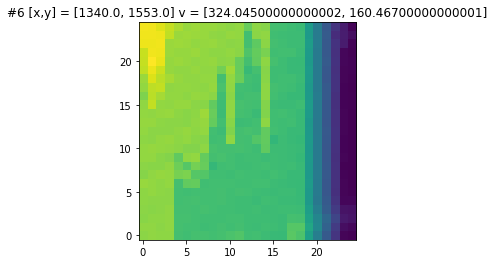

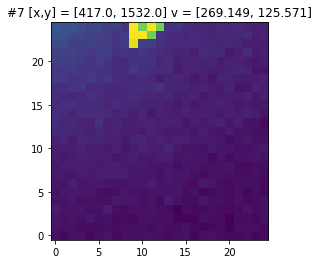

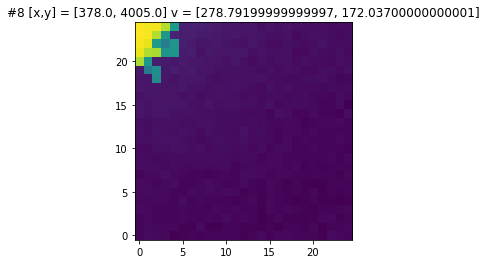

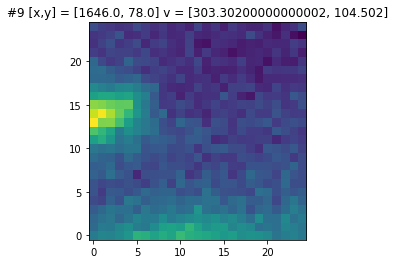

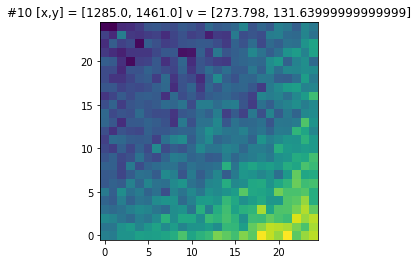

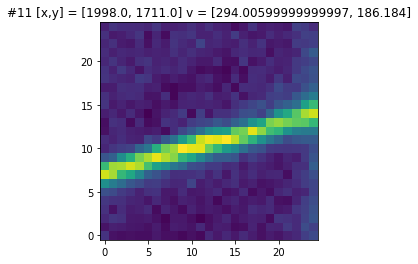

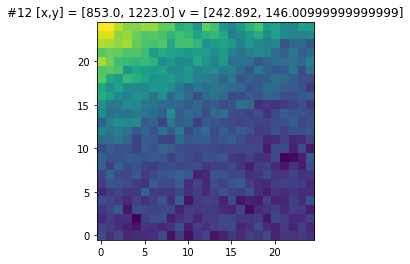

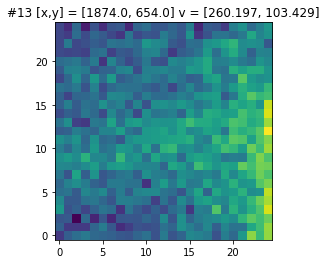

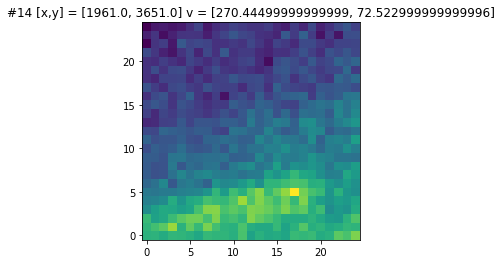

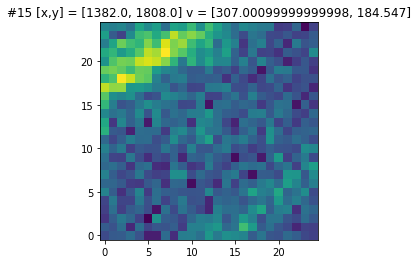

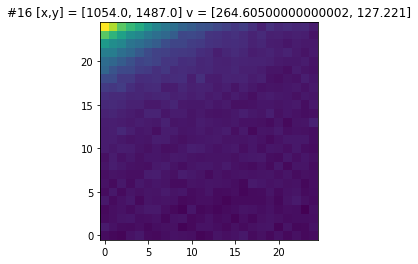

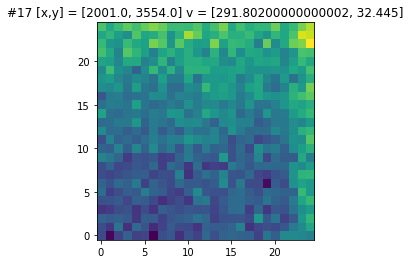

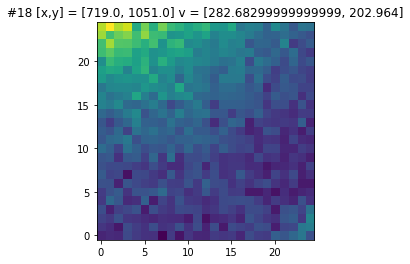

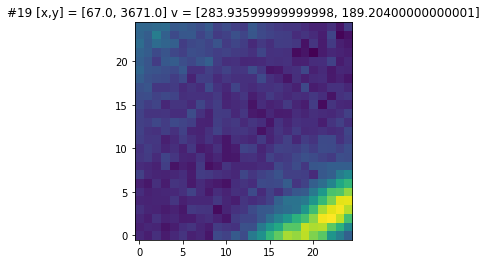

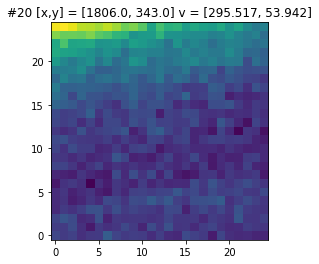

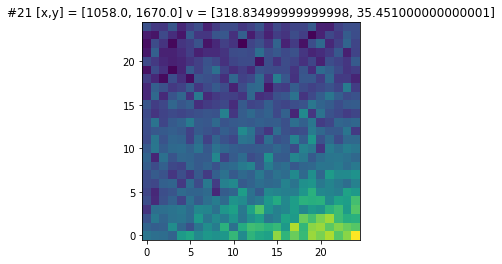

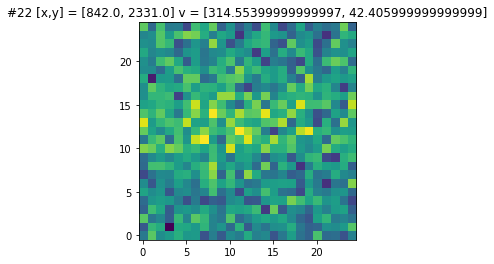

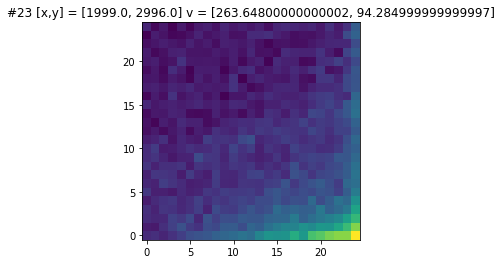

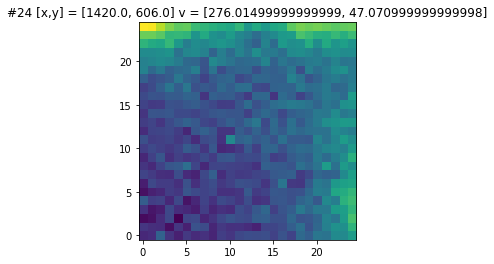

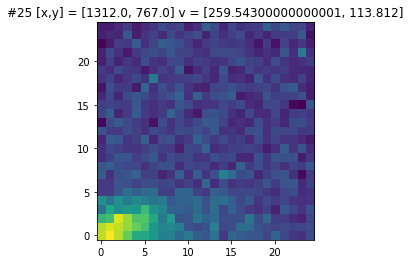

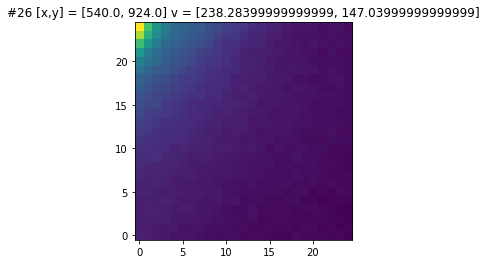

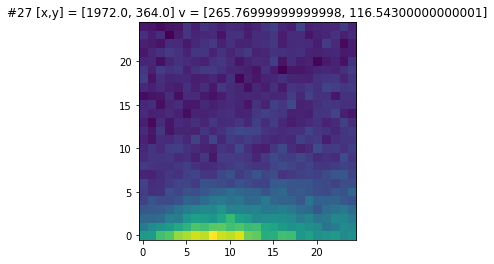

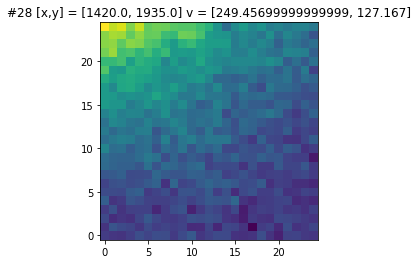

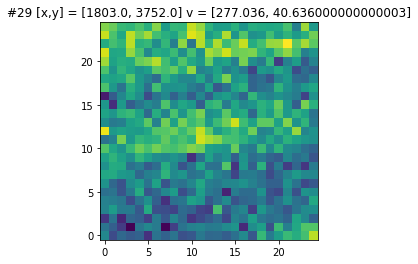

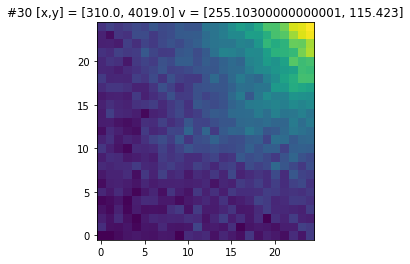

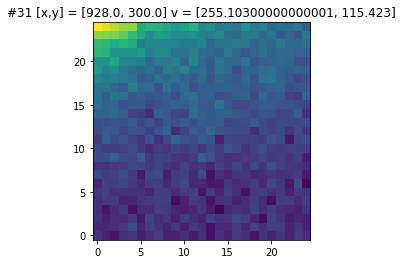

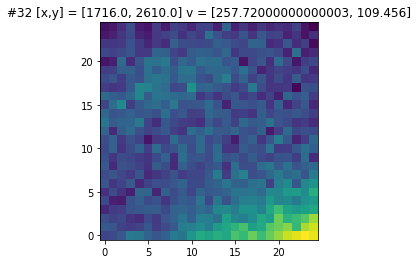

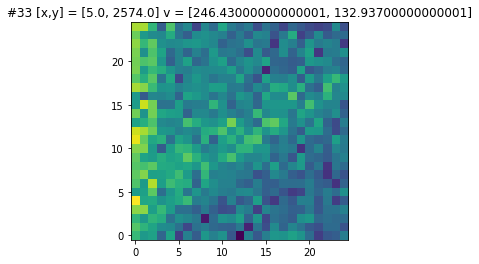

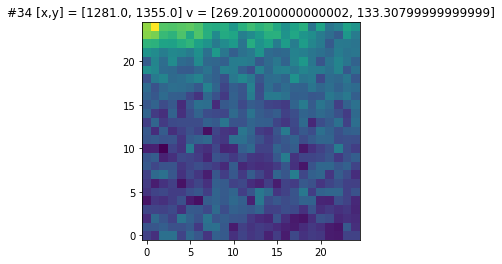

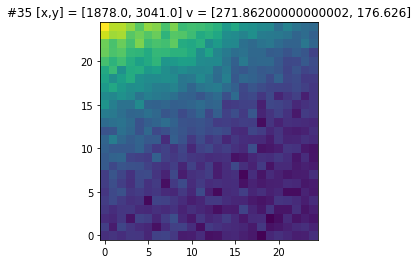

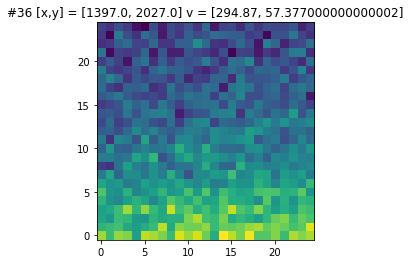

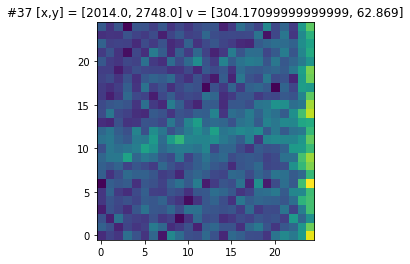

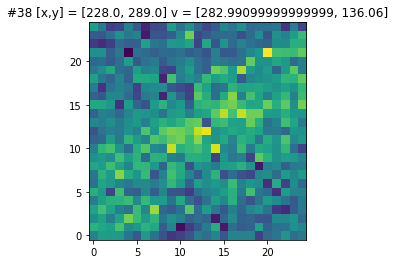

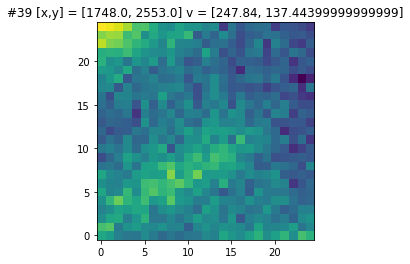

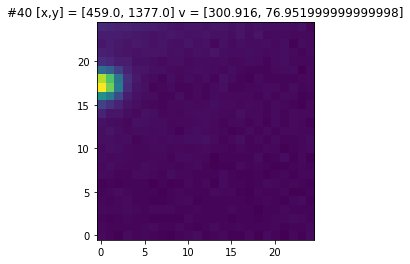

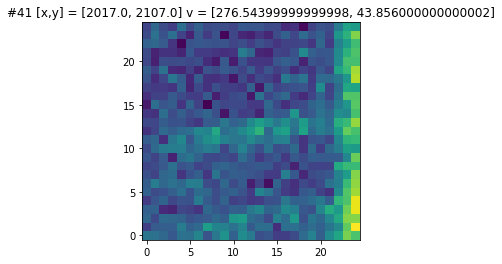

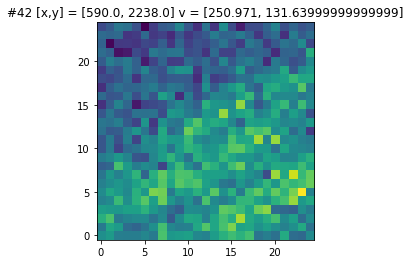

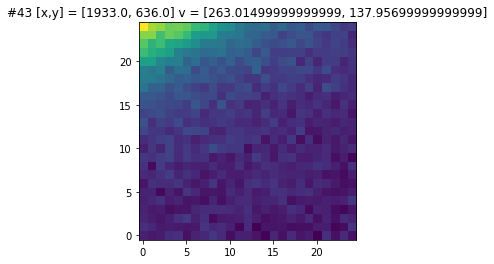

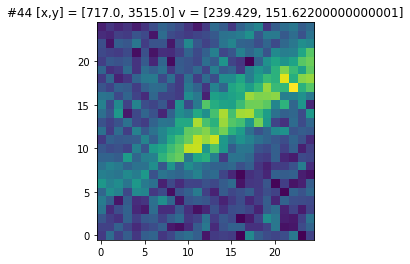

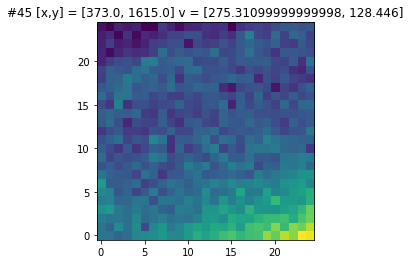

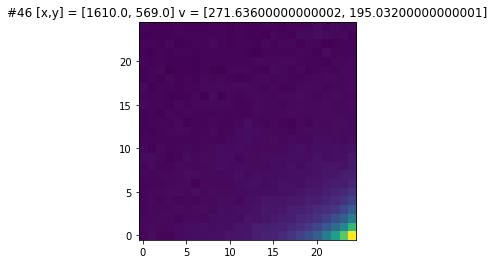

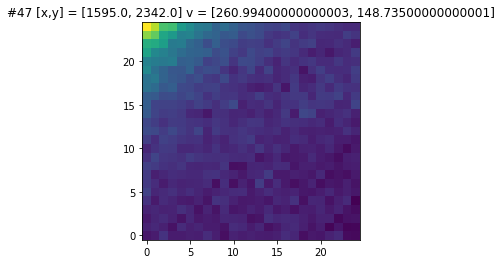

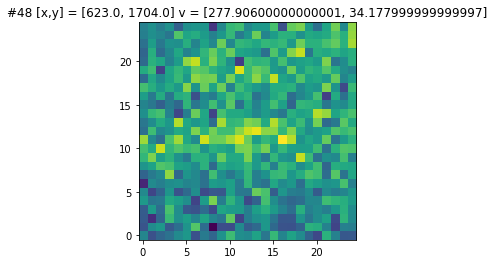

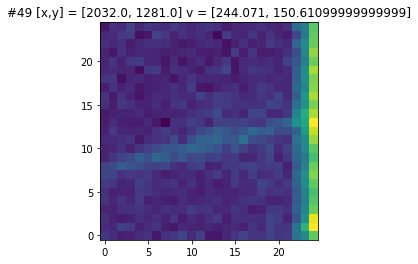

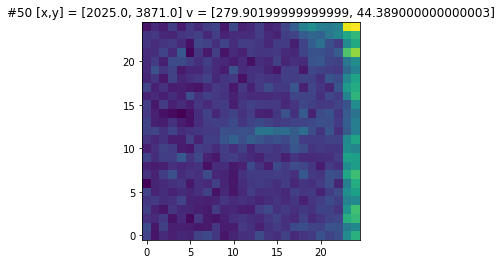

In [18]:
f_results = clustered_results#filtered_results[0]
for imNum in range(min(len(f_results),50)):
    current = imNum#best_targets[imNum]
    try:
        plt.imshow(ai.createPostageStamp(im_array,
                                         list(f_results[['t0_x', 't0_y']][current]),
                                         np.array(list(f_results[['v_x', 'v_y']][current])),
                                         image_times, 
                                         [25., 25.])[0],
                    origin='lower',
               #cmap=plt.cm.Greys_r,
               interpolation='None')
        plt.title(str('#' + str(imNum+1) + ' [x,y] = ' + str(list(f_results[['t0_x', 't0_y']][current])))
                  + ' v = ' + str(list(f_results[['v_x', 'v_y']][current])))
 #   plt.savefig("stamps/stamp"+str(imNum+1)+".png")
        plt.show()
    except:
        print( "out of bounds" )


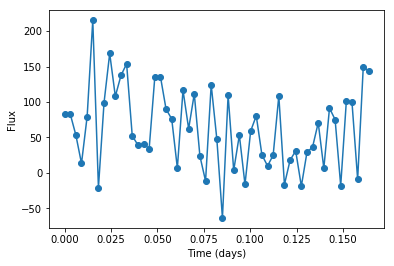

In [15]:
ai.plotLightCurves(im_array, f_results[1], image_times)
plt.show()

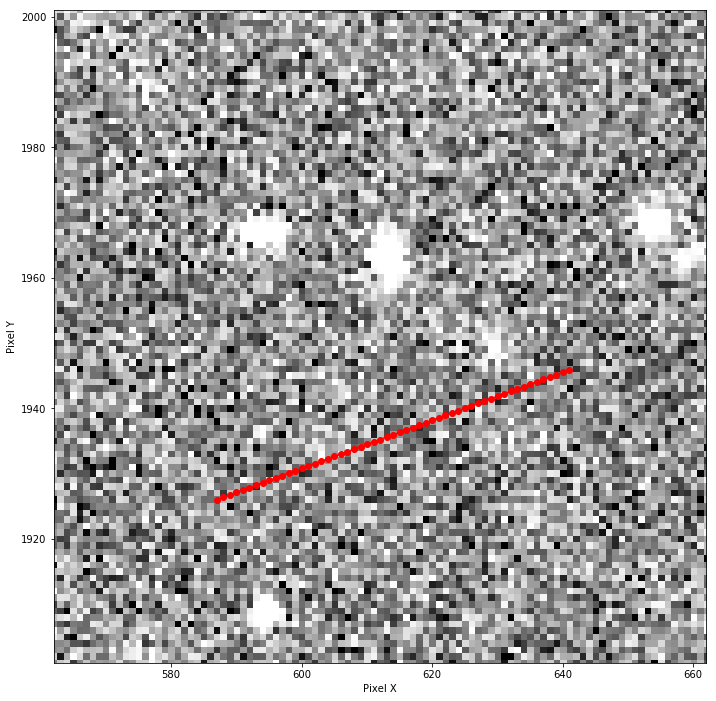

In [36]:
 fig = plt.figure(figsize=(12,12))
ax = ai.plotTrajectory(f_results[2], 
                        image_times, im_array[0], im_plot_args={'vmin':-111, 'vmax':111})
plt.xlabel('Pixel X')
plt.ylabel('Pixel Y')
plt.show()

In [27]:
current = 1
ps = ai.createPostageStamp(im_array,
                                         list(f_results[['t0_x', 't0_y']][current]),
                                         np.array(list(f_results[['v_x', 'v_y']][current])),
                                         image_times, 
                                         [25., 25.])

IndexError: list index out of range

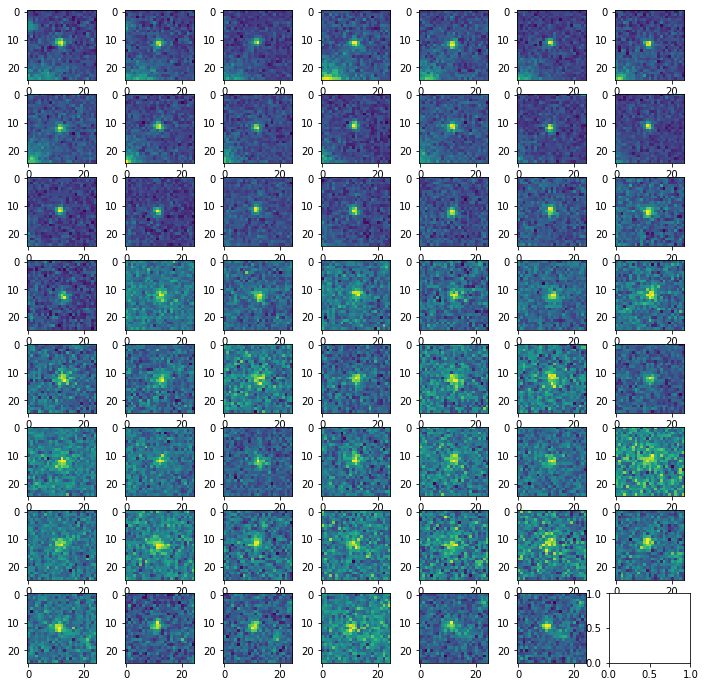

In [56]:
fig = plt.figure(figsize=(12,12))
for im_num in range(56):
    fig.add_subplot(8,7,im_num+1)
    plt.imshow(ps[1][im_num])

In [24]:
len(ps[1])

55